In [2]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Loading the Dataset
data = pd.read_csv('C:\\Users\\daniel.erumiseli\\OneDrive - Dangote Industries Limited\\Desktop\\NEXFORD\\ASSIGNMENT\\BAN 6800\\Milestone 1 assignment\\Cleaned_Walmart_DataSet.csv')
print(data.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  2010-02-05      0.571109             0     0.384132    0.050100   
1      1  2010-02-12      0.570419             1     0.343663    0.038076   
2      1  2010-02-19      0.558473             0     0.358786    0.021042   
3      1  2010-02-26      0.477911             0     0.430138    0.044589   
4      1  2010-03-05      0.535703             0     0.428754    0.076653   

        CPI  Unemployment  Year  Month  Weekday  Quarter  
0  0.840500      0.550477  2010      2        4        1  
1  0.841941      0.550477  2010      2        4        1  
2  0.842405      0.550477  2010      2        4        1  
3  0.842707      0.550477  2010      2        4        1  
4  0.843008      0.550477  2010      3        4        1  


Number of duplicate rows: 0


C:\Users\daniel.erumiseli\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


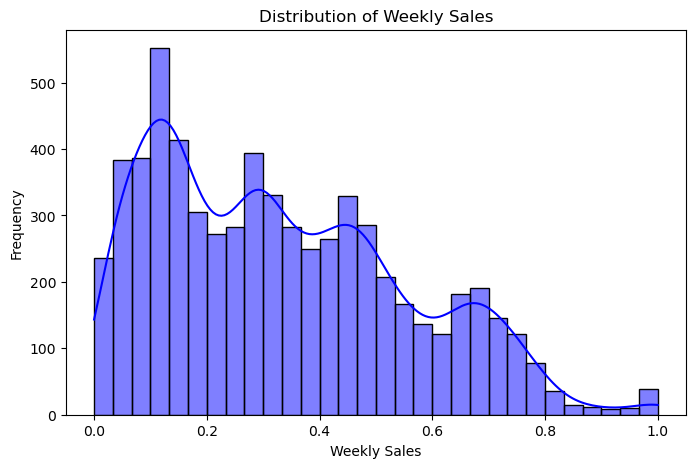

C:\Users\daniel.erumiseli\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


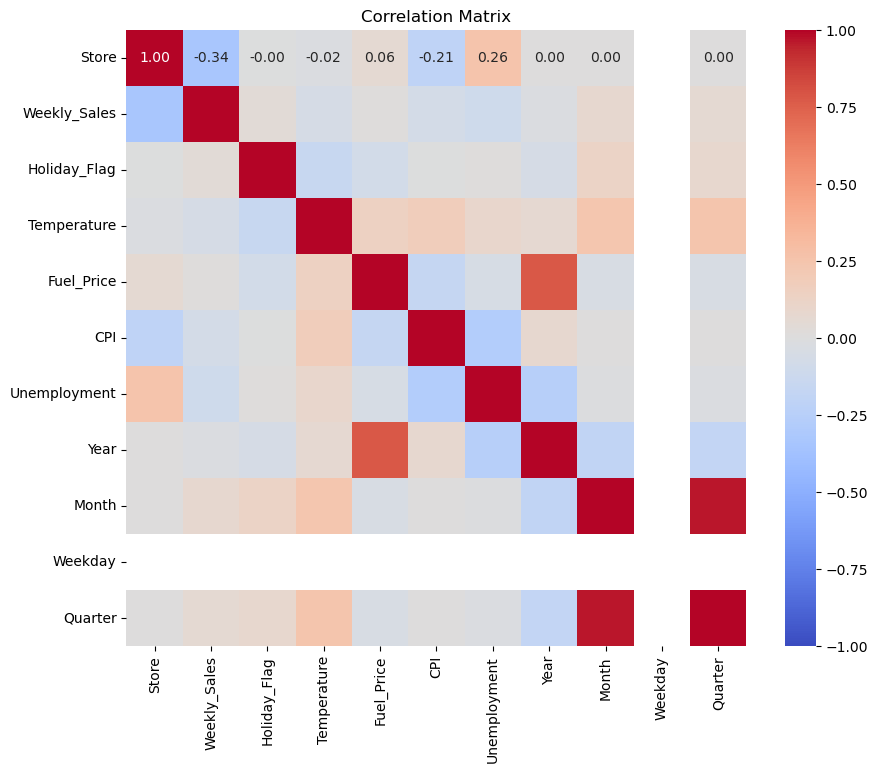

In [8]:
# Step 2: Exploratory Data Analysis (EDA)

# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data['Weekly_Sales'], kde=True, bins=30, color='blue')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Generating a correlation matrix using only numeric columns
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [9]:
# Step 3: Data Splitting

# Defining features and target variable
X = data.drop(columns=['Weekly_Sales', 'Date'])  # Dropping target and date columns
y = data['Weekly_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (5148, 10), Testing data shape: (1287, 10)


In [5]:
# Step 4: Building and Training Models

# Baseline Linear Regression Modeling
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor Modelling
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
### Step 5: Model Evaluation

# Evaluating Linear Regression Model
y_pred_lr = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"RMSE: {lr_rmse:.4f}")
print(f"MAE: {lr_mae:.4f}")
print(f"R^2: {lr_r2:.4f}")

# Evaluating Random Forest Model
y_pred_rf = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"R^2: {rf_r2:.4f}")

Linear Regression Performance:
RMSE: 0.2047
MAE: 0.1719
R^2: 0.1549

Random Forest Performance:
RMSE: 0.0498
MAE: 0.0276
R^2: 0.9500


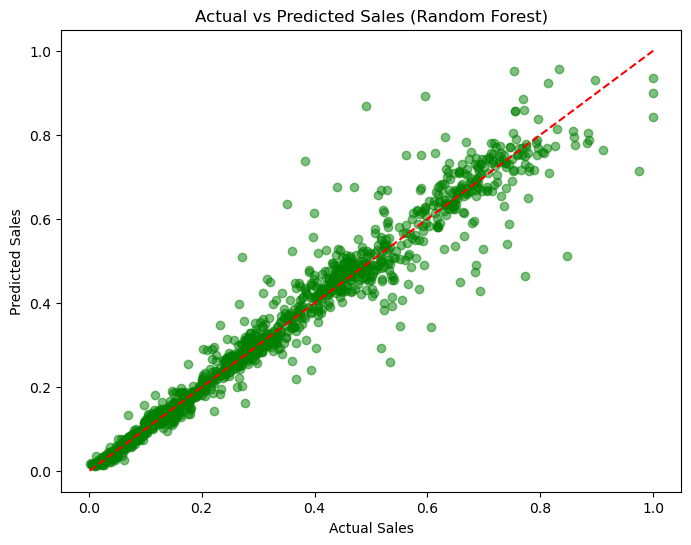

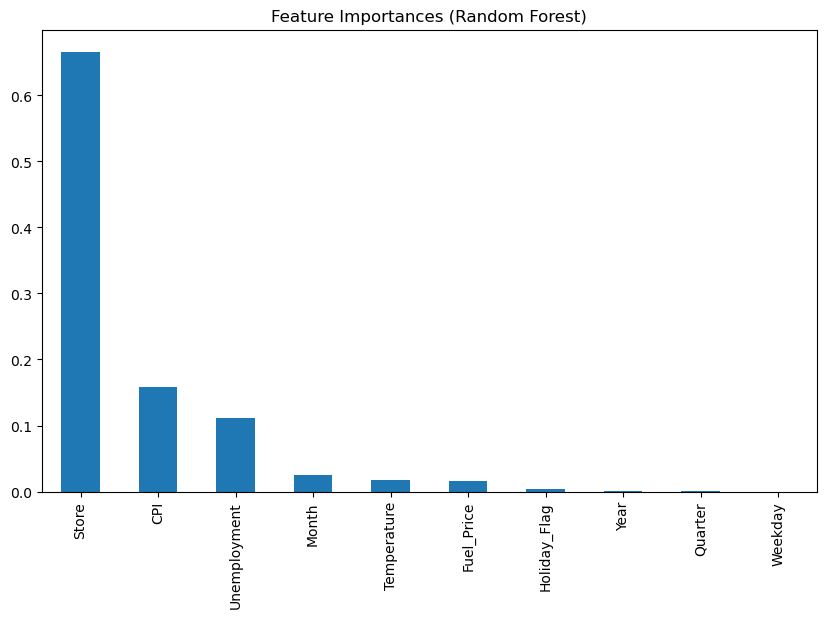

In [11]:
### Step 6: Visualization of Results

# Compare actual vs predicted for Random Forest Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Feature Importance (Random Forest)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances (Random Forest)')
plt.show()